## CNN BASELINE MODEL

In [33]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"]="0,1"

In [34]:
import json

import numpy as np
import pandas as pd
import keras
from keras.callbacks import Callback
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

### 1.Loading 32x32 dataset

In [35]:
X_train = np.load('/home/zxt/data/22_category/32/2k/X_train.npy')
X_validate = np.load('/home/zxt/data/22_category/32/2k/X_validate.npy')
X_test = np.load('/home/zxt/data/22_category/32/2k/X_test.npy')
Y_train = np.load('/home/zxt/data/22_category/32/2k/Y_train.npy')
Y_validate = np.load('/home/zxt/data/22_category/32/2k/Y_validate.npy')
Y_test = np.load('/home/zxt/data/22_category/32/2k/Y_test.npy')

In [36]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_validate.shape[0], 'validate samples')
print(X_test.shape[0], 'test samples')

X_train shape: (35200, 32, 32, 3)
35200 train samples
4400 validate samples
4400 test samples


In [37]:
# Convert the images to float and scale it to a range of 0 to 1
# x_train = X_train.astype('float32')
# x_validate = X_validate.astype('float32')
# x_test = X_test.astype('float32')

X_train /=255.
X_validate /=  255.
X_test /= 255.

In [38]:
# Y_train label
for i in Y_train:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='bobcat':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20
    if i[0]=='coyote':
        i[0]=21

In [39]:
for i in Y_validate:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='bobcat':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20
    if i[0]=='coyote':
        i[0]=21

In [40]:
for i in Y_test:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='bobcat':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20
    if i[0]=='coyote':
        i[0]=21

In [41]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(Y_train,22)
y_valid=np_utils.to_categorical(Y_validate,22)
y_test=np_utils.to_categorical(Y_test,22)

In [42]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

### 2. Create Callback for F1 score

In [43]:
class Metrics(Callback):

    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        X_val, y_val = self.validation_data[:2]
        y_pred = self.model.predict(X_val)

        y_pred_cat = keras.utils.to_categorical(
            y_pred.argmax(axis=1),
            num_classes=num_classes
        )

        _val_f1 = f1_score(y_val, y_pred_cat, average='macro')
        _val_recall = recall_score(y_val, y_pred_cat, average='macro')
        _val_precision = precision_score(y_val, y_pred_cat, average='macro')

        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)

        print((f"val_f1: {_val_f1:.4f}"
               f" - val_precision: {_val_precision:.4f}"
               f" - val_recall: {_val_recall:.4f}"))

        return

### 3. Creating and Training the Model¶

In [44]:
batch_size = 64
num_classes = 22
epochs = 30
save_dir = os.path.join(os.getcwd(), 'models')
model_name = 'keras_cnn_2k_aug_model.h5'

In [45]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [46]:
os.environ["CUDA_VISIBLE_DEVICES"]="0,1"

from keras.utils import multi_gpu_model
parallel_model = multi_gpu_model(model,gpus=2,cpu_merge=True)

#### Data Augmentation

In [47]:
image_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.2,1],
    fill_mode="nearest")

In [48]:
#training the image preprocessing
image_datagen.fit(X_train, augment=True)

In [49]:
f1_metrics = Metrics()

parallel_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

hist = parallel_model.fit(
    X_train, 
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[f1_metrics],
    validation_data=(X_validate, y_valid)
)

Train on 35200 samples, validate on 4400 samples
Epoch 1/30
35200/35200 [==============================] - 11s 322us/step - loss: 1.9410 - accuracy: 0.3430 - val_loss: 1.4607 - val_accuracy: 0.4932
val_f1: 0.4589 - val_precision: 0.5224 - val_recall: 0.4948
Epoch 2/30
35200/35200 [==============================] - 10s 297us/step - loss: 1.4662 - accuracy: 0.4867 - val_loss: 1.2938 - val_accuracy: 0.5509
val_f1: 0.5271 - val_precision: 0.5653 - val_recall: 0.5516
Epoch 3/30
35200/35200 [==============================] - 10s 297us/step - loss: 1.3173 - accuracy: 0.5370 - val_loss: 1.1845 - val_accuracy: 0.5889
val_f1: 0.5645 - val_precision: 0.6122 - val_recall: 0.5903
Epoch 4/30
35200/35200 [==============================] - 11s 302us/step - loss: 1.2099 - accuracy: 0.5796 - val_loss: 1.1009 - val_accuracy: 0.6275
val_f1: 0.6085 - val_precision: 0.6302 - val_recall: 0.6274
Epoch 5/30
35200/35200 [==============================] - 11s 301us/step - loss: 1.1273 - accuracy: 0.6078 - val_lo

### 3.

In [23]:
model.save('/home/zxt/data/model/cnn_baseline_2k_32_64batchsize30epoch.h5')

### 4. Evaluation

In [50]:
history_df = pd.DataFrame(hist.history)
history_df['val_f1'] = f1_metrics.val_f1s
history_df['val_precision'] = f1_metrics.val_precisions
history_df['val_recall'] = f1_metrics.val_recalls

# history_df[['loss', 'val_loss']].plot()
# history_df[['acc', 'val_acc']].plot()
# history_df[['val_f1', 'val_precision', 'val_recall']].plot()

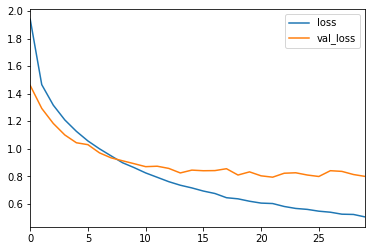

In [51]:
history_df[['loss', 'val_loss']].plot()

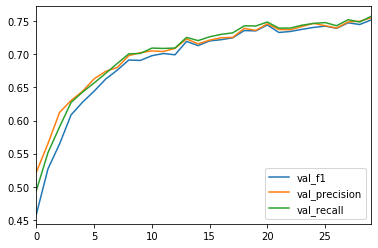

In [52]:
history_df[['val_f1', 'val_precision', 'val_recall']].plot()

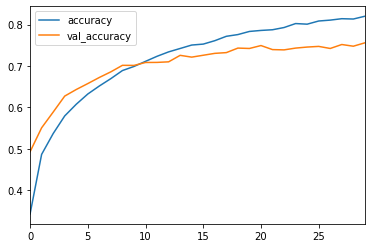

In [53]:
history_df[['accuracy', 'val_accuracy']].plot()

### 5. Prediction

In [54]:
loss,accuracy = parallel_model.evaluate(X_test,y_test)
print('\ntest loss',loss)
print('accuracy',accuracy)

4400/4400 [==============================] - 1s 195us/step

test loss 0.7567141168767756
accuracy 0.7711363434791565
